<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/beta_multiplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import factorial
import numpy as np
from scipy.stats import beta

from matplotlib.pyplot import plot, fill_between, hlines, vlines
from IPython import display


In [2]:
def comb(n,k):
  return factorial(n)/(factorial(k) * factorial(n-k))

In [3]:
def normalize(probabilities):
  total = sum(probabilities)
  return [p / total for p in probabilities]

In [4]:
def binomial_p(n,k):
  def distribution(single_trial_p):
    return comb(n, k) * single_trial_p**k * (1-single_trial_p)**(n-k)

  return distribution

In [5]:
num_points = 20*1000
trial_ps = [p/num_points for p in range(0,num_points+1, 1)]

# Discrete hack first (DO NOT REALLY USE THIS TECHNIQUE)

In [6]:
doomed  = binomial_p(200, 10)  # 200 try, 10 succeed, 190 fail
lucky = binomial_p(100, 90)  # ninety percent success rate

doomed_probs = normalize([doomed(p) for p in trial_ps])
lucky_probs = normalize([lucky(p) for p in trial_ps])

# multiply each discrete probability to approximate the product of two distributions
product_probs = normalize([doomed_p*lucky_p for doomed_p, lucky_p in zip(doomed_probs, lucky_probs)])

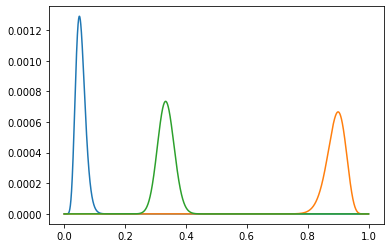

In [7]:
plot(trial_ps, doomed_probs)
plot(trial_ps, lucky_probs) 
plot(trial_ps, product_probs)

##What does it mean to multiply two binomial distributions?

The shape of each curve is determined by $p^k (1-p)^{(n-k)}$

So if we multiply two distributions    
$p^{k1}(1-p)^{n1-k1} p^{k2}(1-p)^{n2-k2}$
We get   

$p^{k1+k2}(1-p)^{(n1+n2)-(k1+k2)}$

Which simplifies to a non-normalized form of Binomial(n1+n2, k1+k2)


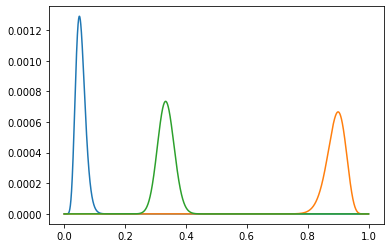

In [8]:
added_parameters = binomial_p(300, 100)
added_parameters_probs = normalize([added_parameters(p) for p in trial_ps])

plot(trial_ps, doomed_probs)
plot(trial_ps, lucky_probs) 
plot(trial_ps, added_parameters_probs)

## SciPy's Beta distribution for the win
If we want accurate results in a timely manner and with less code

In [9]:
doomed_rv = beta(10, 190)
lucky_rv = beta(90, 10)
product_rv = beta(100, 200)

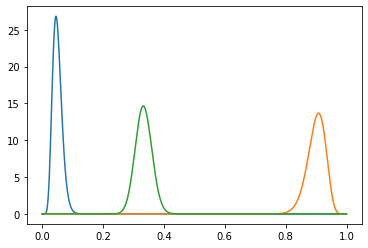

In [10]:
plot(trial_ps, doomed_rv.pdf(trial_ps))
plot(trial_ps, lucky_rv.pdf(trial_ps))
plot(trial_ps, product_rv.pdf(trial_ps))


##Note: The shapes are very similar. The scales are completely different. 
The Beta is producing a correct PDF. Summing point probabilities in a region of the discrete PMF gets you very reasonable answers. But don't look too hard at it...

In [11]:
# A less spiky example
not_good  = binomial_p(20, 7)  # 7 succeed, 13 fail
good = binomial_p(10, 9)  # ninety percent success rate

not_good_probs = normalize([not_good(p) for p in trial_ps])
good_probs = normalize([good(p) for p in trial_ps])

# multiply each discrete probability to approximate the product of two distributions
product_probs = normalize([not_good_p*good_p for not_good_p, good_p in zip(not_good_probs, good_probs)])

not_good_rv = beta(7, 13)
good_rv = beta(9,1)
product_rv = beta(16, 14)


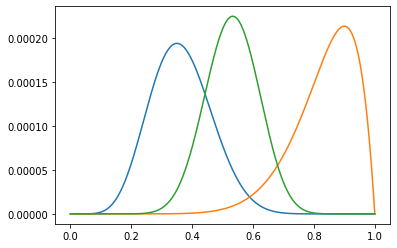

In [12]:
plot(trial_ps, not_good_probs)
plot(trial_ps, good_probs)
plot(trial_ps, product_probs)

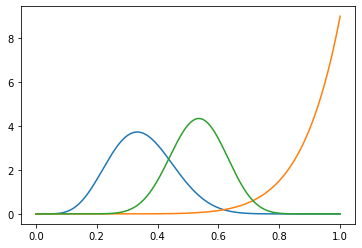

In [13]:
plot(trial_ps, not_good_rv.pdf(trial_ps))
plot(trial_ps, good_rv.pdf(trial_ps))
plot(trial_ps, product_rv.pdf(trial_ps))


### Samples from Bayesian Statistics the Fun Way


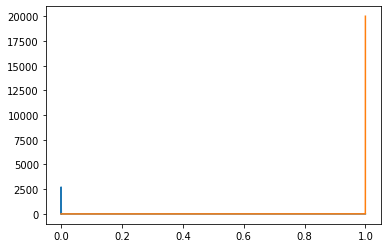

In [14]:
doomed_rv = beta(2, 7440)
lucky_rv = beta(20000, 1)

plot(trial_ps, doomed_rv.pdf(trial_ps))
plot(trial_ps, lucky_rv.pdf(trial_ps))



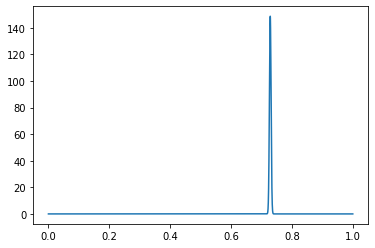

In [15]:
product_rv = beta(20002, 7441)
plot(trial_ps, product_rv.pdf(trial_ps))

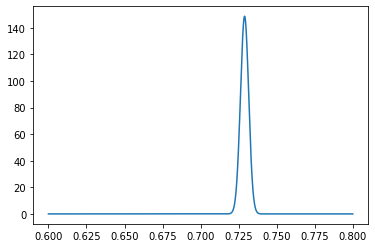

In [16]:
some_points = trial_ps[round(0.6*num_points):round(0.8*num_points)]
plot(some_points, product_rv.pdf(some_points))

## Coin with 6 Heads and 1 Tail

In [17]:
probability_40_60 = beta.cdf([0.4, 0.6], 6, 1) 
print('40 < p < 60 = ', probability_40_60[1] - probability_40_60[0])

probability_80_100 = beta.cdf([0.8, 1], 6, 1) 
print('80 < p < 100 = ', probability_80_100[1] - probability_80_100[0])


40 < p < 60 =  0.04255999999999999
80 < p < 100 =  0.7378559999999998


## Build a Beta with 95% confidence that the coin is fair    
With fair defined as 0.4 < p < 0.6

0.9516743083038137  confident that 40<p<60 at  96  flips


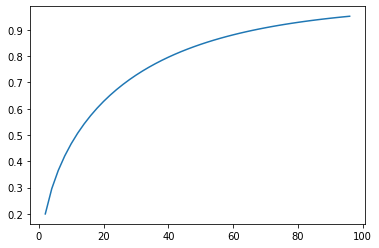

In [18]:
done = False
num_flips = 1
probabilities = []
while (done != True):
  cdf_40_60 = beta.cdf([0.4, 0.6], num_flips, num_flips)
  probability_40_60 = cdf_40_60[1] - cdf_40_60[0]
  if (probability_40_60 >= 0.95):
    print(probability_40_60,' confident that 40<p<60 at ', 2*num_flips, ' flips')
    done = True

  probabilities.append(probability_40_60)
  num_flips = num_flips + 1

plot([2*f for f in range(1, num_flips)], probabilities)

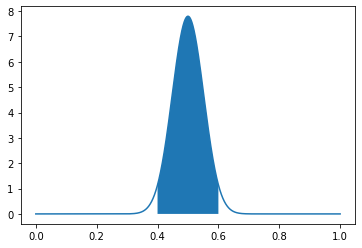

In [19]:
rv = beta(48, 48)
plot(trial_ps, rv.pdf(trial_ps))
some_points = trial_ps[round(0.4*num_points):round(0.6*num_points)]
fill_between(some_points, rv.pdf(some_points))

# Assuming unbiased, how soon do you lose that belief?
Starting with 48 heads and 48 tails as the prior distribution    
Only heads until our belief changes when 0.4 < p <0.6 drops below 50% 


0.49503287889221764  confident that 40<p<60 at  24  additional heads


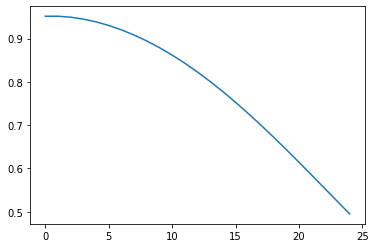

In [20]:
heads = 48
tails = 48
additional_heads = 0

done = False
probabilities = []
while (done != True):
  cdf_40_60 = beta.cdf([0.4, 0.6], heads + additional_heads, tails)
  probability_40_60 = cdf_40_60[1] - cdf_40_60[0]
  if (probability_40_60 <= 0.5):
    print(probability_40_60,' confident that 40<p<60 at ', additional_heads, ' additional heads')
    done = True

  probabilities.append(probability_40_60)
  additional_heads = additional_heads + 1

plot(range(0, additional_heads), probabilities)

## find a probability range 40th percentile to 60th percentile

In [21]:
rv = beta(10,4)
[forty, sixty] = rv.ppf([0.4, 0.6])
print('forty, sixty', forty, sixty)

forty, sixty 0.693321543021004 0.754694301461161


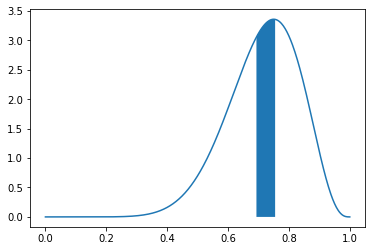

In [22]:
ps = np.linspace(0,1, 500)
center_ps = np.linspace(forty, sixty, 200)

plot(ps, rv.pdf(ps))
fill_between(center_ps, rv.pdf(center_ps))

## Beta respects the fat tail to the left and the impossibility of values greater than 1. 

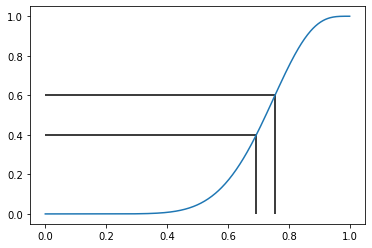

In [23]:
plot(ps, rv.cdf(ps))
hlines(0.4, 0, forty)
vlines(forty, 0, 0.4)
hlines(0.6, 0, sixty)
vlines(sixty, 0, 0.6)